### <center>Linear Regression Modelling Python code - Boston House Prices Project</center>
#### <center>Shalesh Nath Sharma</center>
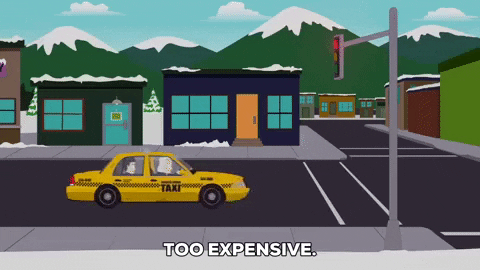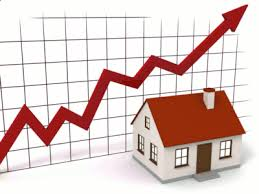

### Linear Regression Model 

In [1]:
# You are interested in building a model that will predict housing values in Boston suburbs using
# various predictor variables that you have available.
# Use Multiple Linear Regression to build your model, with the median value of owner-occupied homes
# as the target variable and the rest as predictors.
# Was able to divide the given dataset into predictors and response and fit the regression model on it.
# Determine the significance of these different predictors, and drop the ones that are not useful for your
# model. Document your work and explain your decision making as you build your model. Report your
# final model's accuracy.

In [2]:
# # Assumptions for Linear reg model:
# 1. The residual error plot should be normally distributed.
# 2. The mean of residual error should be 0 or close to 0 as much as possible
# 3. The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
# 4. Linear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the 
# independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation 
# between independent variables and strength of that correlation.  VIF=11−R2 , If VIF >1 & VIF <5 moderate correlation, 
# VIF < 5 critical level of multicollinearity.
# 5. Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look 
# at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

#### Data Dictionary

1. CRIM per capita crime rate by town
2. INDUS proportion of non-retail business acres per town
3. NOX nitric oxides concentration (parts per 10 million)
4. RM average number of rooms per dwelling
5. AGE proportion of owner-occupied units built prior to '1940'
6. DIS weighted distances to five Boston employment centres
7. TAX full-value property-tax rate per 10,000 (USD)
8. PT pupil-teacher ratio by town
9. B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
10. MV Median value of owner-occupied homes in 1000's (USD) - Dependent variable

In [3]:
# Read Libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
%matplotlib inline
import seaborn as sns
import warnings  
import datetime as dt
import scipy.stats as st

In [4]:
# Set Display parameters
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [5]:
# Change working directory
os.chdir(r'C:\Backup\PYTHON_PROJECT_2020\Hands_On_Projects')

In [6]:
os.getcwd()

'C:\\Backup\\PYTHON_PROJECT_2020\\Hands_On_Projects'

In [7]:
# # Get List of files in working directory 
os.listdir()

['boston.csv',
 'Code_V2 -5_13_2020.py',
 'Data_for_Missing_Values.csv',
 'hp.gif',
 'open.txt',
 'Output',
 'Output.png',
 'Regression - EDA v1.py',
 'Test_data.csv',
 'Train_dataset.csv']

In [8]:
data=pd.read_csv('boston.csv')

In [9]:
## MV is the house price which needs to be predicted using independent variables 

In [10]:
data.head(5)

# Percentage variables:-
# - CRIM
# - INDUS
# - TAX

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
0,0.00632,2.31,0.538,6.575,65.199997,4.0900,296,15.300000,396.899994,24.000000
1,0.02731,7.07,0.469,6.421,78.900002,4.9671,242,17.799999,396.899994,21.600000
2,0.02729,7.07,0.469,7.185,61.099998,4.9671,242,17.799999,392.829987,34.700001
3,0.03237,2.18,0.458,6.998,45.799999,6.0622,222,18.700001,394.630005,33.400002
4,0.06905,2.18,0.458,7.147,54.200001,6.0622,222,18.700001,396.899994,36.200001


In [11]:
# lower the case of column names 
data.columns = map(str.lower, data.columns)  

In [12]:
# Descriptive statistics at overall level
pd.options.display.float_format = '{:.2f}'.format
des1=data.describe(percentiles=[.01,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99,1.0])  
des2=data.isnull().sum().to_frame(name = 'missing').T
des3=data.notnull().sum().to_frame(name = 'non-missing').T
des4=data.skew().to_frame(name = 'skewness').T
des5=data.kurt().to_frame(name = 'kurtosis').T
des6=data.std().to_frame(name = 'standard_deviation').T
des7=data.var().to_frame(name = 'variance').T
des8=data.sum().to_frame(name = 'sum').T
descriptive_final=pd.concat([des1,des2,des3,des4,des5,des6,des7,des8])   
descriptive_final

,crim,indus,nox,rm,age,dis,tax,pt,b,mv
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.14,0.55,6.28,68.57,3.80,408.24,18.46,356.67,22.53
std,8.60,6.86,0.12,0.70,28.15,2.11,168.54,2.16,91.29,9.20
min,0.01,0.46,0.38,3.56,2.90,1.13,187.00,12.60,0.32,5.00
1%,0.01,1.25,0.40,4.52,6.61,1.21,188.00,13.00,6.73,7.01
5%,0.03,2.18,0.41,5.31,17.73,1.46,222.00,14.70,84.59,10.20
10%,0.04,2.91,0.43,5.59,26.95,1.63,233.00,14.75,290.27,12.75
20%,0.06,4.39,0.44,5.84,37.80,1.95,273.00,16.60,364.31,15.30
30%,0.10,5.96,0.47,5.95,52.40,2.26,289.00,17.80,378.67,18.20
40%,0.15,7.38,0.51,6.09,65.40,2.64,307.00,18.40,387.97,19.70


In [13]:
# EDA Insights:-
# Crime rate = 0.01% to 89%; 
# House age variable is widely distribution
# Nearly 75% of regions have non-retail business region less than 18%
# There are 6 rooms on an average in homes
# Most of the employees are living 3-12 kms away from office
# House price range from 5k-50k USD

In [14]:
data.isnull().sum()

crim     0
indus    0
nox      0
rm       0
age      0
dis      0
tax      0
pt       0
b        0
mv       0
dtype: int64

In [15]:
# There are no missing values

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   crim    506 non-null    float64
 1   indus   506 non-null    float64
 2   nox     506 non-null    float64
 3   rm      506 non-null    float64
 4   age     506 non-null    float64
 5   dis     506 non-null    float64
 6   tax     506 non-null    int64  
 7   pt      506 non-null    float64
 8   b       506 non-null    float64
 9   mv      506 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 39.7 KB


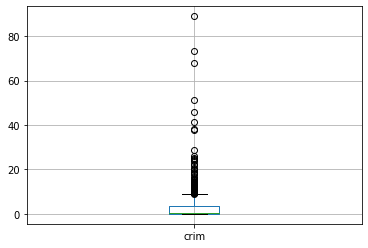

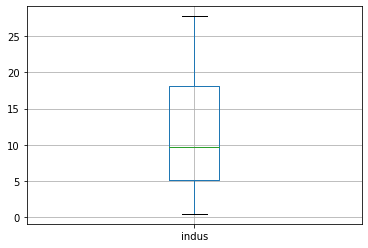

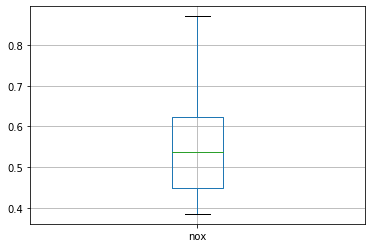

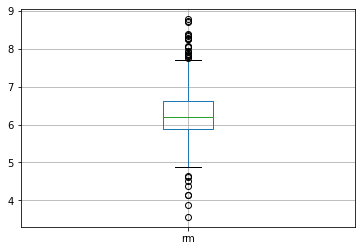

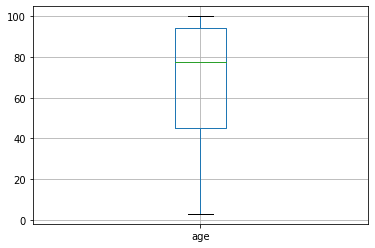

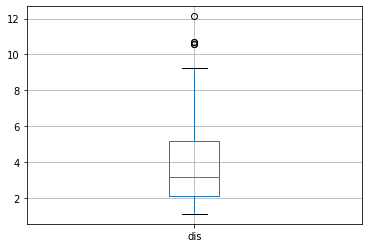

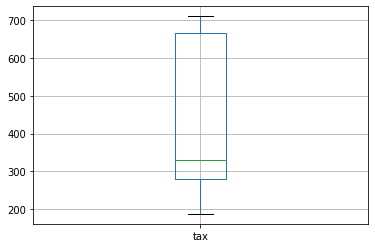

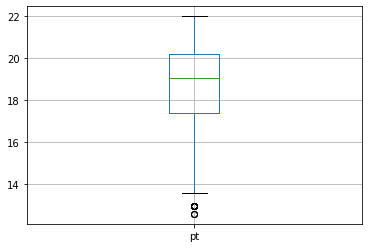

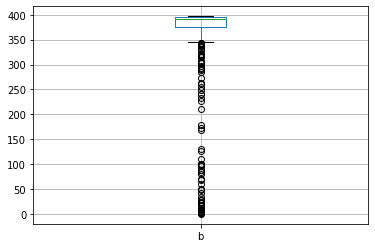

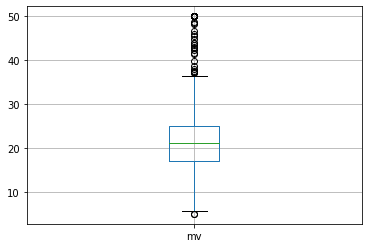

In [17]:
### Plot Box plots for multiple numeric variables 
for i in data.columns:
    f = plt.figure()
    data.boxplot(column=i)
    plt.show()
    
    f.savefig("C:\\Backup\\PYTHON_PROJECT_2020\\Hands_On_Projects\\Output\\\\foo"+"_"+i+".pdf", bbox_inches='tight')     

In [ ]:
## Combine all pdfs into one pdf for box plot results 

from os import listdir,mkdir,startfile
from os.path import isfile, join,exists
from PyPDF2 import PdfFileMerger

#Input file path and print the pdf files in that path
path = input("Enter the folder location: ")
pdffiles = [f for f in listdir(path) if isfile(join(path, f)) and '.pdf' in f]
print('\nList of PDF Files:\n')
for file in pdffiles:
    print(file)

#Input the name of the result file
resultFile = input("\nEnter the name of the result file : ")
if '.pdf' not in resultFile:
    resultFile += '.pdf'

#Append the pdf files
merger = PdfFileMerger()
for pdf in pdffiles:
    merger.append(path+'\\'+pdf)

#If the Output directory does not exist then create one
if not exists(path+'\\Output'):
    mkdir(path+'\\Output')

#Write the merged result file to the Output directory
merger.write(path+'\\Output\\'+resultFile)
merger.close()

#Launch the result file
print('\n'+resultFile,'Successfully created!!! at ',path+'\\Output\\')
startfile(path+'\\Output\\'+resultFile)

In [19]:
### Outliers exist in variables which needs to be treated

In [20]:
cols=data.columns
cols

Index(['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'pt', 'b', 'mv'], dtype='object')

In [21]:
from scipy import stats
data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

,crim,indus,nox,rm,age,dis,tax,pt,b,mv
0,0.01,2.31,0.54,6.57,65.20,4.09,296,15.30,396.90,24.00
1,0.03,7.07,0.47,6.42,78.90,4.97,242,17.80,396.90,21.60
2,0.03,7.07,0.47,7.18,61.10,4.97,242,17.80,392.83,34.70
3,0.03,2.18,0.46,7.00,45.80,6.06,222,18.70,394.63,33.40
4,0.07,2.18,0.46,7.15,54.20,6.06,222,18.70,396.90,36.20
5,0.03,2.18,0.46,6.43,58.70,6.06,222,18.70,394.12,28.70
6,0.09,7.87,0.52,6.01,66.60,5.56,311,15.20,395.60,22.90
7,0.14,7.87,0.52,6.17,96.10,5.95,311,15.20,396.90,27.10
8,0.21,7.87,0.52,5.63,100.00,6.08,311,15.20,386.63,16.50
9,0.17,7.87,0.52,6.00,85.90,6.59,311,15.20,386.71,18.90


In [22]:
# data[data.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [23]:
# Descriptive statistics at overall level
pd.options.display.float_format = '{:.2f}'.format
des1=data.describe(percentiles=[.01,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99,1.0])  
des2=data.isnull().sum().to_frame(name = 'missing').T
des3=data.notnull().sum().to_frame(name = 'non-missing').T
des4=data.skew().to_frame(name = 'skewness').T
des5=data.kurt().to_frame(name = 'kurtosis').T
des6=data.std().to_frame(name = 'standard_deviation').T
des7=data.var().to_frame(name = 'variance').T
des8=data.sum().to_frame(name = 'sum').T
descriptive_final=pd.concat([des1,des2,des3,des4,des5,des6,des7,des8])   
descriptive_final

,crim,indus,nox,rm,age,dis,tax,pt,b,mv
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.14,0.55,6.28,68.57,3.80,408.24,18.46,356.67,22.53
std,8.60,6.86,0.12,0.70,28.15,2.11,168.54,2.16,91.29,9.20
min,0.01,0.46,0.38,3.56,2.90,1.13,187.00,12.60,0.32,5.00
1%,0.01,1.25,0.40,4.52,6.61,1.21,188.00,13.00,6.73,7.01
5%,0.03,2.18,0.41,5.31,17.73,1.46,222.00,14.70,84.59,10.20
10%,0.04,2.91,0.43,5.59,26.95,1.63,233.00,14.75,290.27,12.75
20%,0.06,4.39,0.44,5.84,37.80,1.95,273.00,16.60,364.31,15.30
30%,0.10,5.96,0.47,5.95,52.40,2.26,289.00,17.80,378.67,18.20
40%,0.15,7.38,0.51,6.09,65.40,2.64,307.00,18.40,387.97,19.70


In [24]:
for i in cols:
    q_low = data[i].quantile(0.05)
    q_high  = data[i].quantile(0.95)
    print("q_low","for",i,"is",q_low)
    print("q_high","for",i,"is",q_high)

q_low for crim is 0.027909999499999998
q_high for crim is 15.789149997500001
q_low for indus is 2.180000067
q_high for indus is 21.88999939
q_low for nox is 0.40925000575
q_high for nox is 0.74000001
q_low for rm is 5.3139998915
q_high for rm is 7.58750009575
q_low for age is 17.72500038
q_high for age is 100.0
q_low for dis is 1.4619750382499999
q_high for dis is 7.827799797000001
q_low for tax is 222.0
q_high for tax is 666.0
q_low for pt is 14.69999981
q_high for pt is 21.0
q_low for b is 84.58999824749999
q_high for b is 396.89999389999997
q_low for mv is 10.19999981
q_high for mv is 43.3999996175


In [17]:
data2=data.copy()

In [26]:
# Outlier treatment through Windsorization method (P1, P99)
for i in cols:
    q_low  = data2[i].quantile(0.01)
    q_high = data2[i].quantile(0.99)
    data2  = data2[(data2[i] > q_low) & (data2[i] < q_high)] 
    
data2.head(3)    

,crim,indus,nox,rm,age,dis,tax,pt,b,mv
2,0.03,7.07,0.47,7.18,61.10,4.97,242,17.80,392.83,34.70
3,0.03,2.18,0.46,7.00,45.80,6.06,222,18.70,394.63,33.40
5,0.03,2.18,0.46,6.43,58.70,6.06,222,18.70,394.12,28.70


In [27]:
# data2 = data[(data['rm'] > 5.3) & (data['rm'] < 7.5)]
# data2 = data[(data['crim'] > 0.02) & (data['crim'] < 15)]

In [28]:
data2.shape

(195, 10)

In [29]:
data['rm'].min()

3.5610001089999996

In [30]:
# Descriptive statistics at overall level
pd.options.display.float_format = '{:.2f}'.format
des1=data2.describe(percentiles=[.01,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99,1.0])  
des2=data2.isnull().sum().to_frame(name = 'missing').T
des3=data2.notnull().sum().to_frame(name = 'non-missing').T
des4=data2.skew().to_frame(name = 'skewness').T
des5=data2.kurt().to_frame(name = 'kurtosis').T
des6=data2.std().to_frame(name = 'standard_deviation').T
des7=data2.var().to_frame(name = 'variance').T
des8=data2.sum().to_frame(name = 'sum').T
descriptive_final=pd.concat([des1,des2,des3,des4,des5,des6,des7,des8])   
descriptive_final

,crim,indus,nox,rm,age,dis,tax,pt,b,mv
count,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00
mean,0.28,7.19,0.49,6.40,57.76,4.63,312.22,17.96,383.80,24.81
std,0.47,4.00,0.05,0.58,26.10,1.78,60.32,1.81,21.12,7.01
min,0.01,1.32,0.40,4.97,6.80,1.80,193.00,14.70,240.16,13.60
1%,0.01,1.46,0.40,5.41,7.80,2.09,193.00,14.70,292.09,14.75
5%,0.03,2.18,0.41,5.65,15.40,2.38,222.00,14.70,347.16,16.60
10%,0.03,2.89,0.43,5.82,19.32,2.49,224.00,15.20,369.77,18.20
20%,0.05,3.44,0.44,5.92,30.10,2.97,270.00,16.60,377.55,19.48
30%,0.07,4.93,0.44,6.02,40.62,3.44,279.00,17.08,385.95,20.70
40%,0.09,5.86,0.46,6.14,51.48,3.80,300.00,17.72,389.42,22.00


In [31]:
# # Remove Outliers using IQR method (columnwise one at a time) 

# def remove_outlier(df_in,col_name):
#     q1 = df_in[col_name].quantile(0.25)
#     q3 = df_in[col_name].quantile(0.75)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     df_in = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_in

In [32]:
# # data2 = pd.DataFrame() # empty dataframe 

# for i in cols:
#     remove_outlier(data,i)
#     print(i)
    
# data.head(5)

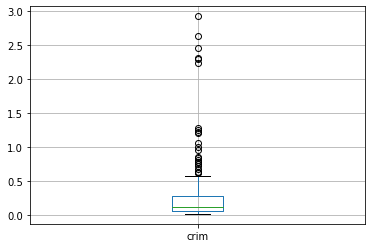

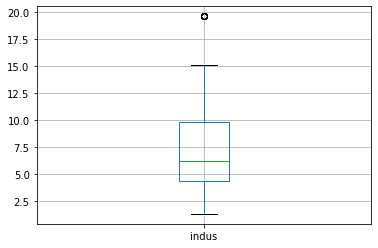

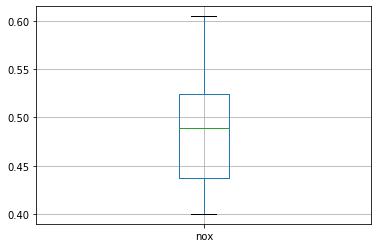

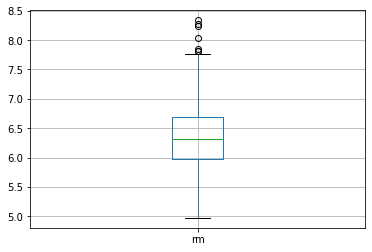

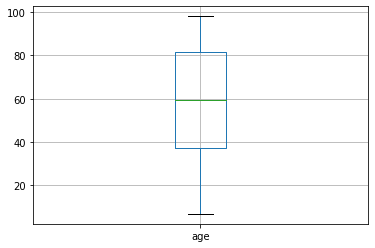

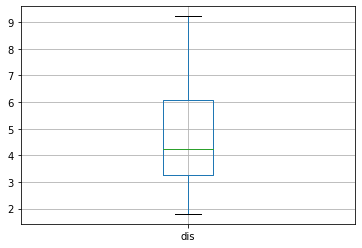

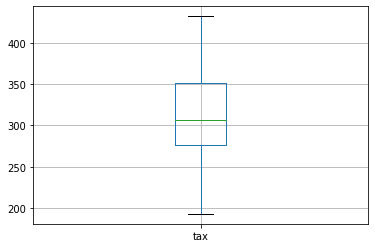

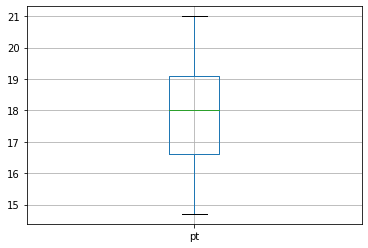

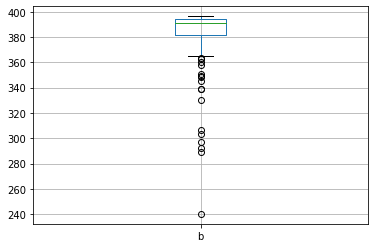

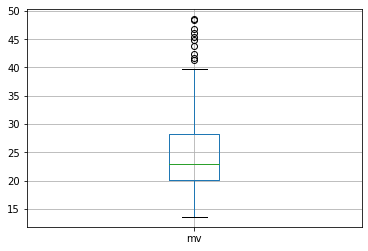

In [33]:
for i in data.columns:
    f = plt.figure()
    data2.boxplot(column=i)
    plt.show()
    f.savefig("C:\\Backup\\PYTHON_PROJECT_2020\\Hands_On_Projects\\Output\\\\post_foo"+"_"+i+".pdf", bbox_inches='tight')     

In [34]:
## Combine all pdfs into one pdf for box plot results 

from os import listdir,mkdir,startfile
from os.path import isfile, join,exists
from PyPDF2 import PdfFileMerger

#Input file path and print the pdf files in that path
path = input("Enter the folder location: ")
pdffiles = [f for f in listdir(path) if isfile(join(path, f)) and '.pdf' in f]
print('\nList of PDF Files:\n')
for file in pdffiles:
    print(file)

#Input the name of the result file
resultFile = input("\nEnter the name of the result file : ")
if '.pdf' not in resultFile:
    resultFile += '.pdf'

#Append the pdf files
merger = PdfFileMerger()
for pdf in pdffiles:
    merger.append(path+'\\'+pdf)

#If the Output directory does not exist then create one
if not exists(path+'\\Output'):
    mkdir(path+'\\Output')

#Write the merged result file to the Output directory
merger.write(path+'\\Output\\'+resultFile)
merger.close()

#Launch the result file
print('\n'+resultFile,'Successfully created!!! at ',path+'\\Output\\')
startfile(path+'\\Output\\'+resultFile)

# C:\Backup\PYTHON_PROJECT_2020\Hands_On_Projects\Output

Enter the folder location: C:\Backup\PYTHON_PROJECT_2020\Hands_On_Projects\Output

List of PDF Files:

assignment_02_histograms.pdf
foo_age.pdf
foo_b.pdf
foo_crim.pdf
foo_dis.pdf
foo_indus.pdf
foo_mv.pdf
foo_nox.pdf
foo_pt.pdf
foo_rm.pdf
foo_tax.pdf
post_foo_age.pdf
post_foo_b.pdf
post_foo_crim.pdf
post_foo_dis.pdf
post_foo_indus.pdf
post_foo_mv.pdf
post_foo_nox.pdf
post_foo_pt.pdf
post_foo_rm.pdf
post_foo_tax.pdf

Enter the name of the result file : final2

final2.pdf Successfully created!!! at  C:\Backup\PYTHON_PROJECT_2020\Hands_On_Projects\Output\Output\


In [36]:
# Correlation matrix 
pd.options.display.float_format = '{:.2f}'.format
corr_result=data2.corr()
corr_result.style.background_gradient(cmap='coolwarm').set_precision(2)
corr_result

,crim,indus,nox,rm,age,dis,tax,pt,b,mv
crim,1.00,0.60,0.59,-0.20,0.37,-0.35,0.25,-0.08,-0.63,-0.16
indus,0.60,1.00,0.64,-0.33,0.42,-0.50,0.37,0.03,-0.38,-0.30
nox,0.59,0.64,1.00,-0.26,0.66,-0.73,0.27,0.17,-0.30,-0.26
rm,-0.20,-0.33,-0.26,1.00,-0.15,0.08,-0.18,-0.32,0.16,0.87
age,0.37,0.42,0.66,-0.15,1.00,-0.57,0.11,0.18,-0.13,-0.28
dis,-0.35,-0.50,-0.73,0.08,-0.57,1.00,-0.16,-0.12,0.14,0.01
tax,0.25,0.37,0.27,-0.18,0.11,-0.16,1.00,-0.11,-0.27,-0.26
pt,-0.08,0.03,0.17,-0.32,0.18,-0.12,-0.11,1.00,0.15,-0.40
b,-0.63,-0.38,-0.30,0.16,-0.13,0.14,-0.27,0.15,1.00,0.11
mv,-0.16,-0.30,-0.26,0.87,-0.28,0.01,-0.26,-0.40,0.11,1.00


In [37]:
cmap = cmap=sns.diverging_palette(20, 300, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr_result.style.background_gradient(cmap=plt.cm.RdYlGn, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,crim,indus,nox,rm,age,dis,tax,pt,b,mv
crim,1.00,0.60,0.59,-0.20,0.37,-0.35,0.25,-0.08,-0.63,-0.16
indus,0.60,1.00,0.64,-0.33,0.42,-0.50,0.37,0.03,-0.38,-0.30
nox,0.59,0.64,1.00,-0.26,0.66,-0.73,0.27,0.17,-0.30,-0.26
rm,-0.20,-0.33,-0.26,1.00,-0.15,0.08,-0.18,-0.32,0.16,0.87
age,0.37,0.42,0.66,-0.15,1.00,-0.57,0.11,0.18,-0.13,-0.28
dis,-0.35,-0.50,-0.73,0.08,-0.57,1.00,-0.16,-0.12,0.14,0.01
tax,0.25,0.37,0.27,-0.18,0.11,-0.16,1.00,-0.11,-0.27,-0.26
pt,-0.08,0.03,0.17,-0.32,0.18,-0.12,-0.11,1.00,0.15,-0.40
b,-0.63,-0.38,-0.30,0.16,-0.13,0.14,-0.27,0.15,1.00,0.11
mv,-0.16,-0.30,-0.26,0.87,-0.28,0.01,-0.26,-0.40,0.11,1.00


In [38]:
data2.columns

Index(['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'pt', 'b', 'mv'], dtype='object')

In [39]:
corr_result.loc[:,'mv'] 

crim    -0.16
indus   -0.30
nox     -0.26
rm       0.87
age     -0.28
dis      0.01
tax     -0.26
pt      -0.40
b        0.11
mv       1.00
Name: mv, dtype: float64

In [9]:
### Hypothesis for the model:-
# 1. House price increases with decrease in Crime rate  
# 2. House price increases with increase in non-retail business
# 3. House price decrease with increase in NOX
# 4. House price decrease with decrease in no of rooms (RM)
# 5. House price increase with decrease in house age
# 6. House price increase with decrease in distance between office to home
# 7. House price decrease with increase in tax rate of housing circle (due to low occupancy rate)
# 8. House price increase with increase in STR ratio 
# 9. House price decrease with increase in black population due to safety concerns

In [51]:
# Correlation of dependent variable (house price) with independent variables 
corr_result.iloc[0:-1,-1]  

crim    -0.16
indus   -0.30
nox     -0.26
rm       0.87
age     -0.28
dis      0.01
tax     -0.26
pt      -0.40
b        0.11
Name: mv, dtype: float64

In [ ]:
### Analyse relationships between variables (Bivariate analysis)
# Hypothesis-1 (crim)  is true (no significant relationship with house price)
# Hypothesis-2 (indus) is false
# Hypothesis-3 (nox) is true (no significant relationship with house price)
# Hypothesis-4 (rm) is true
# Hypothesis-5 (age) is true 
# Hypothesis-6 (dist) is false (no significant relationship with house price)
# Hypothesis-7 (tax) is true
# Hypothesis-8 (pt) is false
# Hypothesis-9 (black )is false (no significant relationship with house price)    

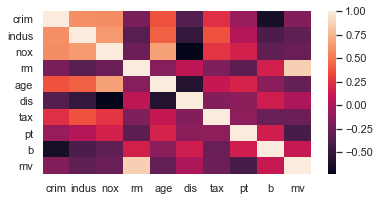

In [46]:
# Heat map 
sns.set(rc={'figure.figsize':(6,3)})
corr_result = data2.corr()
sns.heatmap(corr_result, 
            xticklabels=corr_result.columns.values,
            yticklabels=corr_result.columns.values)

In [ ]:
# The darker the color gets, the more negative linear relationship exists between the variables.
# Both the upper and lower triangular area have the same elements. 
# Therefore, we only need to show one of these in order to check correlation

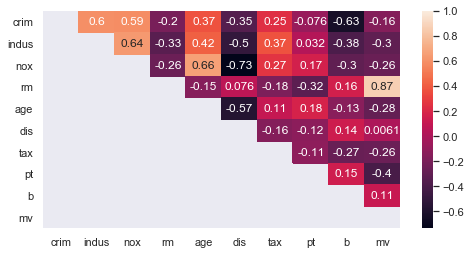

In [50]:
# Upper triangle
fig, ax = plt.subplots(figsize=(8, 4)) 
mask = np.zeros_like(data2.corr())
mask[np.tril_indices_from(mask)] = 1
sns.heatmap(data2.corr(), mask= mask, ax= ax, annot= True)

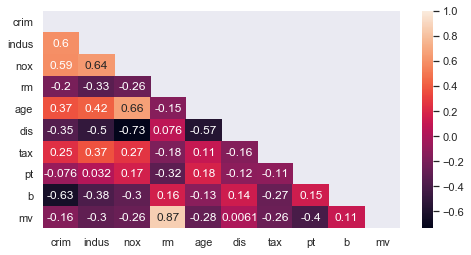

In [49]:
# Lower triangle  
fig, ax = plt.subplots(figsize=(8, 4)) 
mask = np.zeros_like(data2.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(data2.corr(), mask= mask, ax= ax, annot= True)

In [52]:
data2.columns

Index(['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'pt', 'b', 'mv'], dtype='object')

In [53]:
# Remove highly correlated variables to avoid multicollinearity

# - nox and age are highly postive correlated
# - b and crim are highly negative correlated
# - indus and crim are highly positive correlated
# - indus and nox are highly positive correlated
# - nox and dist are highly negative correlated

# Keep only select variables
data3=pd.DataFrame(data2,columns=['crim', 'indus', 'rm', 'age', 'dis', 'tax', 'pt', 'b', 'mv'])

# Multiple Linear Regression using Scikit-Learn

In [18]:
data2.shape

(506, 10)

In [19]:
data2.columns

Index(['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'pt', 'b', 'mv'], dtype='object')

In [56]:
# sampling
from sklearn.model_selection import train_test_split

In [57]:
# Code for splitting the data into train and test splits 
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = data[['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'pt', 'b']]
y = data['mv']

X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.25,random_state=200)

In [58]:
print("The training data dimensions:",X_train.shape)
print("The testing data dimentions  ",X_test.shape)

The training data dimensions: (379, 9)
The testing data dimentions   (127, 9)


In [59]:
# Instantiate model-1
reg1 = LinearRegression()

# Fit Model
reg1.fit(X_train, y_train)

# Predict
y_pred = reg1.predict(X_test)

In [60]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # actual vs predicted 

6.55068229619265


In [61]:
 # print the coefficients
print(reg1.intercept_)
print('')
print(reg1.coef_)
print('')
list(zip(X,reg1.coef_))  

17.746914349729508

[-7.09664106e-02 -1.66826706e-01 -1.36466244e+01  6.06504446e+00
 -5.03798484e-02 -1.27137203e+00 -1.28287624e-03 -1.05019413e+00
  1.22963316e-02]



[('crim', -0.07096641061029511),
 ('indus', -0.166826706322614),
 ('nox', -13.646624423846431),
 ('rm', 6.065044456849934),
 ('age', -0.05037984838488027),
 ('dis', -1.271372031082271),
 ('tax', -0.0012828762412726076),
 ('pt', -1.0501941257751808),
 ('b', 0.012296331585307562)]

In [62]:
coeff_df = pd.DataFrame(reg1.coef_, X.columns, columns=['Beta_Coefficient'])  
coeff_df

,Beta_Coefficient
crim,-0.07
indus,-0.17
nox,-13.65
rm,6.07
age,-0.05
dis,-1.27
tax,-0.00
pt,-1.05
b,0.01


In [63]:
y_pred = reg1.predict(X_test)

In [64]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.head(10)

,Actual,Predicted
207,22.50,20.06
13,20.40,18.42
22,15.20,18.97
369,50.00,22.19
444,10.80,12.84
88,23.60,30.14
325,24.60,25.04
477,12.00,12.11
221,21.70,24.87
384,8.80,5.26


Text(0.5, 0, 'Actual')

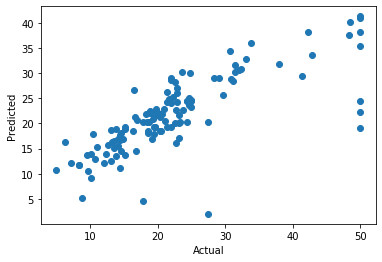

In [65]:
# Create a scatterplot of the real test values versus the predicted values
plt.scatter(df['Actual'], df['Predicted'])
plt.ylabel('Predicted')
plt.xlabel('Actual')

In [66]:
df1['diff'] = abs(df1['Actual'] - df['Predicted'])

C:\Users\deepanker.anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


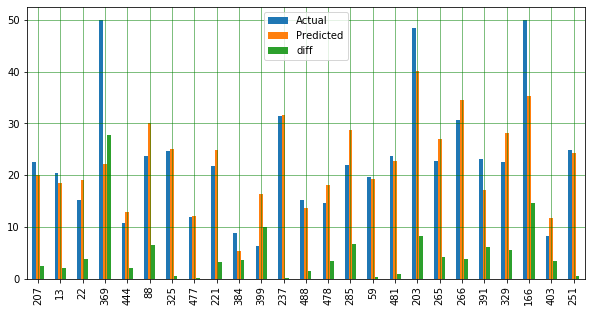

In [67]:
# plot the comparison of Actual and Predicted values (fit chart)
df1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black') 
plt.show()

In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.068359630637352
Mean Squared Error: 42.91143854565181
Root Mean Squared Error: 6.55068229619265


In [69]:
# print the R-squared value for the model
reg1.score(X, y)    

0.6566593802612299

In [70]:
# print the adjusted R-squared value for the model
import statsmodels.api as sm
X = sm.add_constant(X_train)
model = sm.OLS(y_train.values.reshape(-1,1), X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     88.89
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           8.23e-87
Time:                        22:45:09   Log-Likelihood:                -1142.5
No. Observations:                 379   AIC:                             2305.
Df Residuals:                     369   BIC:                             2344.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7469      5.675      3.127      0.002       6.588      28.905
crim          -0.0710      0.046     -1.555      0.121      -0.161       0.019
indus         -0.1668      0.073     -2.292      0.022      -0.310      -0.024
nox          -13.6466      4.704     -2.901      0.004     -22.898      -4.396
rm             6.0650      0.436     13.909      0.000       5.208       6.922
age           -0.0504      0.015     -3.351      0.001      -0.080      -0.021
dis           -1.2714      0.221     -5.763      0.000      -1.705      -0.838
tax           -0.0013      0.003     -0.454      0.650      -0.007       0.004
pt            -1.0502      0.146     -7.195      0.000      -1.337      -0.763
b              0.0123      0.003      3.790      0.000       0.006       0.019
==============================================================================
Omnibus:                      249.141   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3953.388
Skew:                           2.505   Prob(JB):                         0.00
Kurtosis:                      18.008   Cond. No.                     1.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Multiple Linear Regression using statsmodels

In [71]:
import statsmodels.formula.api as smf

In [72]:
data2.head(5)

,crim,indus,nox,rm,age,dis,tax,pt,b,mv
0,0.01,2.31,0.54,6.57,65.20,4.09,296,15.30,396.90,24.00
1,0.03,7.07,0.47,6.42,78.90,4.97,242,17.80,396.90,21.60
2,0.03,7.07,0.47,7.18,61.10,4.97,242,17.80,392.83,34.70
3,0.03,2.18,0.46,7.00,45.80,6.06,222,18.70,394.63,33.40
4,0.07,2.18,0.46,7.15,54.20,6.06,222,18.70,396.90,36.20


1. CRIM per capita crime rate by town
2. INDUS proportion of non-retail business acres per town
3. NOX nitric oxides concentration (parts per 10 million)
4. RM average number of rooms per dwelling
5. AGE proportion of owner-occupied units built prior to '1940'
6. DIS weighted distances to five Boston employment centres
7. TAX full-value property-tax rate per 10,000 (USD)
8. PT pupil-teacher ratio by town
9. B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
10. MV Median value of owner-occupied homes in 1000's (USD)

Feature: 0, Score: -0.07097
Feature: 1, Score: -0.16683
Feature: 2, Score: -13.64662
Feature: 3, Score: 6.06504
Feature: 4, Score: -0.05038
Feature: 5, Score: -1.27137
Feature: 6, Score: -0.00128
Feature: 7, Score: -1.05019
Feature: 8, Score: 0.01230


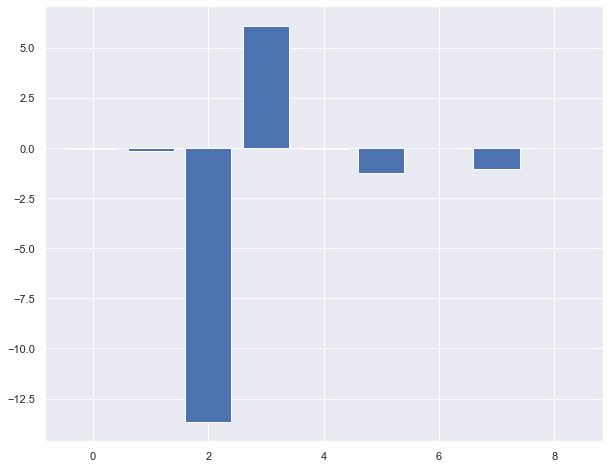

In [118]:
# linear regression feature importance

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define the model
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)

# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [120]:
### RFE method for feature ranking
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
linear_regression = LinearRegression()

rfe = RFE(estimator = linear_regression, n_features_to_select = 5, step = 1)
rfe.fit(X_train,y_train)
rfe_features=X_train.columns[rfe.support_]
pd.DataFrame({'feature':X_train.columns,'rank':rfe.ranking_}).sort_values(by='rank')

,feature,rank
1,indus,1
2,nox,1
3,rm,1
5,dis,1
7,pt,1
0,crim,2
4,age,3
8,b,4
6,tax,5


In [73]:
str='MV~CRIM+INDUS+TAX+PT+B+DIS+RM'
str.lower()

'mv~crim+indus+tax+pt+b+dis+rm'

In [74]:
reg=smf.ols('mv~crim+indus+tax+pt+b+dis+rm',data=data2)
results=reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     mv   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sat, 13 Jun 2020   Prob (F-statistic):          7.99e-104
Time:                        22:45:19   Log-Likelihood:                -1587.4
No. Observations:                 506   AIC:                             3191.
Df Residuals:                     498   BIC:                             3225.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9219      4.301     -0.912      0.3

In [75]:
print(results.aic)
print(results.bic)

3190.766222839294
3224.5785161935937


In [76]:
print(results.condition_number)

9579.772559831992


In [77]:
results.llf

-1587.383111419647

In [121]:
# refit the model based on p-values 
reg=smf.ols('mv~crim+indus+pt+b+dis+rm',data=data2)
results=reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     mv   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     142.5
Date:                Sat, 13 Jun 2020   Prob (F-statistic):          8.81e-105
Time:                        23:42:59   Log-Likelihood:                -1587.7
No. Observations:                 506   AIC:                             3189.
Df Residuals:                     499   BIC:                             3219.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9106      4.299     -0.910      0.3

###### <font color=brown> <b><u><i> Beta coefficient interpretation for each predictor variable:-
  - <i><font color=brown> For a unit increase in distance, the house price will decrease by 0.5 units ,</font> </i>
  - <i><font color=brown> For a unit increase in no of rooms, the house price will increase by 6 units</font> </i> 
  - <i><font color=brown> For a unit increase in pt ratio, the house price will decrease by 0.9 units </font> </i> 
  - <i><font color=brown> For a unit decrease in crime, the house price will increase by 0.13 units </font> </i> 
    </i></u></b> </font>           

In [122]:
print(results.rsquared)
print(results.rsquared_adj)

0.6314388197119467
0.6270072223537737


In [123]:
rsq=results.rsquared
adjrsq=results.rsquared_adj

In [124]:
# Print the confidence interval for each column
results.conf_int()

,0,1
Intercept,-12.36,4.54
crim,-0.20,-0.07
indus,-0.35,-0.12
pt,-1.18,-0.67
b,0.01,0.02
dis,-0.89,-0.22
rm,6.11,7.69


In [125]:
# Get the predicted value of dep variable 
predictions=results.predict(X_train)
print(type(predictions))
print(predictions.head(10))

<class 'pandas.core.series.Series'>
419   18.26
367   -0.97
239   27.51
267   44.78
245   17.15
425   10.62
78    21.80
130   20.58
179   31.65
314   25.97
dtype: float64


In [126]:
actuals=y_train

In [127]:
# Model Accuracy metrics 
mae = metrics.mean_absolute_error(actuals,predictions)
print("mae=",mae)

mqe = metrics.mean_squared_error(actuals,predictions)
print("mqe=",mqe)

# Mean square error (MSE)
mse = metrics.mean_squared_error(actuals,predictions)
print("mse=",mse)

# Root mean squared error (RMSE)
root_mse = np.sqrt(mse)
print("rmse=",root_mse)

mape=np.mean(abs((actuals - predictions)/actuals)) #MAPE
print("mape=",mape)

mae= 3.4619807960481834
mqe= 26.862783151623624
mse= 26.862783151623624
rmse= 5.182931906905938
mape= 0.18866195390706408


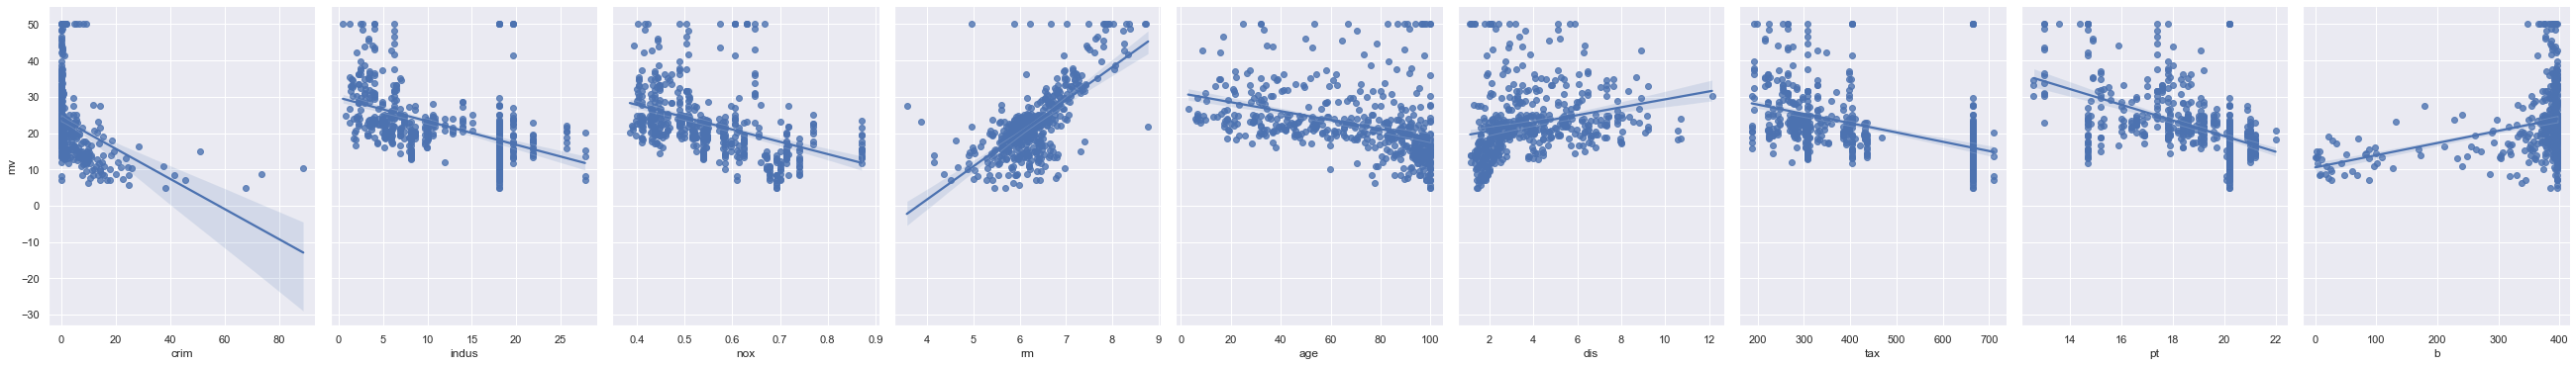

In [107]:
# Plotting the Least Squares Line
sns.set(rc={'figure.figsize':(10,8)})

sns.pairplot(data, x_vars=['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'pt', 'b'], y_vars='mv', height=5, aspect=0.8, kind='reg')

In [108]:
df = pd.DataFrame({'Actual': actuals, 'Predicted': predictions})
df1 = df.head(25)
df1

,Actual,Predicted
419,8.40,22.06
367,23.10,0.35
239,23.30,27.53
267,50.00,44.23
245,18.50,17.28
425,8.30,15.22
78,21.20,21.86
130,19.20,21.23
179,37.20,31.03
314,23.80,25.97


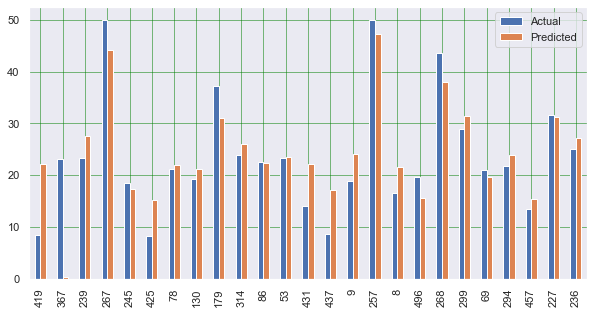

In [109]:
# plot the comparison of Actual and Predicted values
df1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black') 
plt.show()

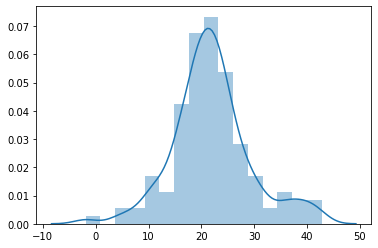

In [82]:
sns.distplot(predictions)

In [83]:
# Get the actual value of dependent variable 
actuals=data['mv']

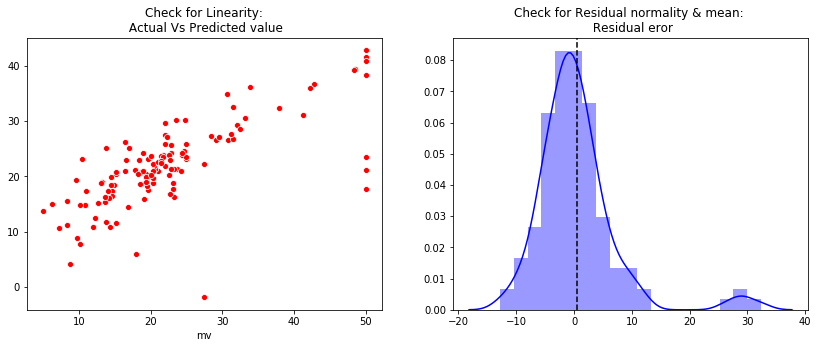

In [84]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,predictions,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - predictions),ax=ax,color='b')
ax.axvline((y_test - predictions).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

In [85]:
# The residual error plot should be normally distributed.

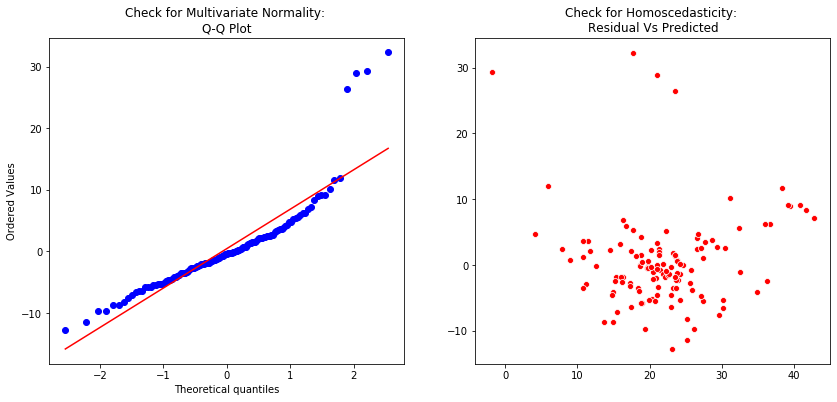

In [86]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))

import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - predictions),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - predictions), x= predictions, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [87]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- rsq)
VIF

2.4691400155234295

In [52]:
# Calculate Standard Beta coefficients for the model 
from scipy import stats
import statsmodels.formula.api as smf

# standardizing dataframe
df_z = data2.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)

# fitting regression
formula = 'mv~tax+pt+dis+rm'
result_std = smf.ols(formula, data=df_z).fit()

# checking results
result_std.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mv   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           6.97e-97
Time:                        22:44:04   Log-Likelihood:                -489.30
No. Observations:                 506   AIC:                             988.6
Df Residuals:                     501   BIC:                             1010.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.628e-17      0.028   3.39e-15      1.000      -0.056       0.056
tax           -0.2255      0.037     -6.084      0.000      -0.298      -0.153
pt            -0.2126      0.033     -6.402      0.000      -0.278      -0.147
dis           -0.0352      0.034     -1.043      0.298      -0.101       0.031
rm             0.5612      0.031     18.184      0.000       0.501       0.622
==============================================================================
Omnibus:                      283.914   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3186.214
Skew:                           2.217   Prob(JB):                         0.00
Kurtosis:                      14.465   Cond. No.                         2.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# In our model the actual vs predicted plot is not a curve so linear assumption satisfies
# The residual mean is zero and residual error plot is normally distributed
# Q-Q plot is fine
# The plot is exhibit heteroscedastic, error will increase after certain point.
# Variance inflation factor value is less than 5, so no multicollearity.  

###### <font color=brown> <b><u><i> Key Modelling Insights, Variable Significance from final model summary:-
  - <i><font color=brown> Adjusted R-Square for the boston model is ~ 63% ie, 63% of the variation in house prices is explained by predictor variables</font> </i>
  - <i><font color=brown> Adjusted and Non-Adjusted R-Square are closer, this shows significant attributes were fed to the model. Hence, penalisation is negligible</font> </i> 
  - <i><font color=brown> AIC and BIC for the final model is lower compared to previous model iterations </font> </i>
  - <i><font color=brown> VIF for the model < 5; hence, no multicollinearity is present </font> </i>
  - <i><font color=brown> Typical asusmptions for the model has been tests and we found the linearity, heteroskedacticity, residuals were true  </font> </i>

In [113]:
# Perform K-fold cross validation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold

X = data[['tax','pt','dis','rm']]
y = data['mv']

cv = KFold(shuffle=True, random_state=2, n_splits=10)

scores = cross_val_score(reg1,X,y,cv = cv, scoring = 'neg_mean_absolute_error')

In [114]:
# MAE value 
print('%.8f'%scores.mean())   

-3.87099111


###### <font color=brown> <b><u><i> Reasons for Dropping predictor variables from the model run
  - <i><font color=brown> Indus variable is dropped by model because their p values < 5% ,</font> </i>
  - <i><font color=brown> NOX and age variables was dropped due to fact that NOX variable is highly correlated with Indus and Age</font> </i>